<a href="https://colab.research.google.com/github/samobrien878/DS2002F24/blob/main/api_Homework_DS2002_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json
import pandas as pd
import json
import requests

In [89]:
stock = input("Please Enter a stock ticker symbol: ")

Please Enter a stock ticker symbol: AAPL


In [104]:
df = []

#Get API of target stock

In [105]:
apikey=""

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)


if response.status_code == 200:
    print(response.text)
else:
    print(f"Failed to fetch data from API. Status code: {response.status_code}")
    print("Response:", response.text)

{"quoteResponse":{"result":[{"language":"en-US","region":"US","quoteType":"EQUITY","typeDisp":"Equity","quoteSourceName":"Nasdaq Real Time Price","triggerable":true,"customPriceAlertConfidence":"HIGH","currency":"USD","hasPrePostMarketData":true,"firstTradeDateMilliseconds":345479400000,"priceHint":2,"regularMarketChange":0.43699646,"regularMarketTime":1727459222,"regularMarketDayHigh":229.52,"regularMarketDayRange":"227.3 - 229.52","regularMarketDayLow":227.3,"regularMarketVolume":16877003,"regularMarketPreviousClose":227.52,"bid":227.72,"ask":228.18,"bidSize":1,"askSize":1,"fullExchangeName":"NasdaqGS","financialCurrency":"USD","regularMarketOpen":228.43,"averageDailyVolume3Month":55583992,"averageDailyVolume10Day":76355650,"fiftyTwoWeekLowChange":63.877,"fiftyTwoWeekLowChangePercent":0.38930398,"fiftyTwoWeekRange":"164.08 - 237.23","fiftyTwoWeekHighChange":-9.272995,"fiftyTwoWeekHighChangePercent":-0.03908863,"fiftyTwoWeekLow":164.08,"fiftyTwoWeekHigh":237.23,"fiftyTwoWeekChangePerc

#Get Target Stock Data

In [106]:
stock_json_target = response.json()

if not stock_json_target['quoteResponse']['result']:
    print("Error: Stock does not exsist")

else:
  print("Ticker Symbol: " + str(stock_json_target['quoteResponse']['result'][0]["symbol"]) +"\n"  +
      "Full Name: " + str(stock_json_target['quoteResponse']['result'][0]["longName"]) + "\n" +
      "Current Price: $" + str(stock_json_target['quoteResponse']['result'][0]["regularMarketPrice"]) + "\n"
      "Stock Mean Price: $" + str(stock_json_target['quoteResponse']['result'][0]["fiftyDayAverage"]) + "\n"
      "52 Week High: " + str(stock_json_target['quoteResponse']['result'][0]["fiftyTwoWeekHigh"]) + "\n" +
      "52 Week Low: " + str(stock_json_target['quoteResponse']['result'][0]["fiftyTwoWeekLow"]) + "\n")


Ticker Symbol: AAPL
Full Name: Apple Inc.
Current Price: $227.957
Stock Mean Price: $222.0196
52 Week High: 237.23
52 Week Low: 164.08



#Get the data into a df

In [107]:
df.append({
    "Ticker Symbol": str(stock_json_target['quoteResponse']['result'][0]["symbol"]),
    "Full Name": str(stock_json_target['quoteResponse']['result'][0]["longName"]),
    "Current Price": stock_json_target['quoteResponse']['result'][0]["regularMarketPrice"],
    "Stock Mean Price": stock_json_target['quoteResponse']['result'][0]["fiftyDayAverage"],
    "52 Week High": stock_json_target['quoteResponse']['result'][0]["fiftyTwoWeekHigh"],
    "52 Week Low": stock_json_target['quoteResponse']['result'][0]["fiftyTwoWeekLow"]
})
df

[{'Ticker Symbol': 'AAPL',
  'Full Name': 'Apple Inc.',
  'Current Price': 227.957,
  'Stock Mean Price': 222.0196,
  '52 Week High': 237.23,
  '52 Week Low': 164.08}]

#Get Trending Stocks Symbols

In [116]:
apikey=""

url = "https://yfapi.net/v1/finance/trending/US"

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

if response.status_code == 200:
    print(response.text)
else:
    print(f"Failed to fetch data from API. Status code: {response.status_code}")
    print("Response:", response.text)

{"finance":{"result":[{"count":20,"quotes":[{"symbol":"NIO"},{"symbol":"IONQ"},{"symbol":"RKLB"},{"symbol":"COST"},{"symbol":"LULU"},{"symbol":"LLY"},{"symbol":"BMY"},{"symbol":"TSLA"},{"symbol":"TSM"},{"symbol":"ACHC"},{"symbol":"PAY.TO"},{"symbol":"CVS"},{"symbol":"PLUG"},{"symbol":"ONCO"},{"symbol":"DJT"},{"symbol":"ASTS"},{"symbol":"SATS"},{"symbol":"HOOD"},{"symbol":"AMZN"},{"symbol":"WBA"}],"jobTimestamp":1727457839269,"startInterval":202409271600}],"error":null}}


In [117]:
stocks_json_trending = response.json()
stocks = []
for i in range(5):
  stocks.append(stocks_json_trending['finance']['result'][0]['quotes'][i]['symbol'])

symbols = ",".join(stocks)
print(symbols)

NIO,IONQ,RKLB,COST,LULU


#Get API of tredning stocks

In [118]:
apikey=""

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":symbols}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

if response.status_code == 200:
    print(response.text)
else:
    print(f"Failed to fetch data from API. Status code: {response.status_code}")
    print("Response:", response.text)

{"quoteResponse":{"result":[{"language":"en-US","region":"US","quoteType":"EQUITY","typeDisp":"Equity","quoteSourceName":"Nasdaq Real Time Price","triggerable":true,"customPriceAlertConfidence":"HIGH","currency":"USD","hasPrePostMarketData":true,"firstTradeDateMilliseconds":1536759000000,"priceHint":2,"regularMarketChange":0.71989965,"regularMarketTime":1727459295,"regularMarketDayHigh":6.66,"regularMarketDayRange":"5.995 - 6.66","regularMarketDayLow":5.995,"regularMarketVolume":141973351,"regularMarketPreviousClose":5.78,"bid":6.54,"ask":6.55,"bidSize":400,"askSize":280,"fullExchangeName":"NYSE","financialCurrency":"CNY","regularMarketOpen":6.01,"averageDailyVolume3Month":50980187,"averageDailyVolume10Day":74952630,"fiftyTwoWeekLowChange":2.8899,"fiftyTwoWeekLowChangePercent":0.8005263,"fiftyTwoWeekRange":"3.61 - 9.57","fiftyTwoWeekHighChange":-3.0700998,"fiftyTwoWeekHighChangePercent":-0.3208046,"fiftyTwoWeekLow":3.61,"fiftyTwoWeekHigh":9.57,"fiftyTwoWeekChangePercent":-36.061947,"di

#Get data of trending stocks

In [119]:
symbols = symbols.split(',')
symbols

['NIO', 'IONQ', 'RKLB', 'COST', 'LULU']

In [121]:
stocks_json_trending = response.json()
print("Trending Stocks!" + "\n")
if not stock_json_target['quoteResponse']['result']:
    print("Error: Stock does not exsist")
else:
  for i in symbols:
    for j in stocks_json_trending['quoteResponse']['result']:
        if j["symbol"] == i:
            print("Ticker Symbol: " + str(j["symbol"]) + "\n" +
                  "Full Name: " + str(j["longName"]) + "\n" +
                  "Current Price: $" + str(j["regularMarketPrice"]) + "\n" +
                  "Stock Mean Price: $" + str(j["fiftyDayAverage"]) + "\n" +
                  "52 Week High: " + str(j["fiftyTwoWeekHigh"]) + "\n" +
                  "52 Week Low: " + str(j["fiftyTwoWeekLow"]) + "\n")
            print("-" * 40)



Trending Stocks!

Ticker Symbol: NIO
Full Name: NIO Inc.
Current Price: $6.4999
Stock Mean Price: $4.5048
52 Week High: 9.57
52 Week Low: 3.61

----------------------------------------
Ticker Symbol: IONQ
Full Name: IonQ, Inc.
Current Price: $9.48
Stock Mean Price: $7.4746
52 Week High: 16.6
52 Week Low: 6.22

----------------------------------------
Ticker Symbol: RKLB
Full Name: Rocket Lab USA, Inc.
Current Price: $9.8
Stock Mean Price: $6.1473
52 Week High: 10.29
52 Week Low: 3.47

----------------------------------------
Ticker Symbol: COST
Full Name: Costco Wholesale Corporation
Current Price: $883.75
Stock Mean Price: $868.658
52 Week High: 923.83
52 Week Low: 540.23

----------------------------------------
Ticker Symbol: LULU
Full Name: Lululemon Athletica Inc.
Current Price: $282.05
Stock Mean Price: $258.201
52 Week High: 516.39
52 Week Low: 226.01

----------------------------------------


#Get the trending stocks into a df

In [122]:
for i in symbols:
    for j in stocks_json_trending['quoteResponse']['result']:
        if j["symbol"] == i:
            df.append({
                "Ticker Symbol": j["symbol"],
                "Full Name": j["longName"],
                "Current Price": j["regularMarketPrice"],
                "Stock Mean Price": j["fiftyDayAverage"],
                "52 Week High": j["fiftyTwoWeekHigh"],
                "52 Week Low": j["fiftyTwoWeekLow"]
            })
df

[{'Ticker Symbol': 'AAPL',
  'Full Name': 'Apple Inc.',
  'Current Price': 227.957,
  'Stock Mean Price': 222.0196,
  '52 Week High': 237.23,
  '52 Week Low': 164.08},
 {'Ticker Symbol': 'NIO',
  'Full Name': 'NIO Inc.',
  'Current Price': 6.4999,
  'Stock Mean Price': 4.5048,
  '52 Week High': 9.57,
  '52 Week Low': 3.61},
 {'Ticker Symbol': 'IONQ',
  'Full Name': 'IonQ, Inc.',
  'Current Price': 9.48,
  'Stock Mean Price': 7.4746,
  '52 Week High': 16.6,
  '52 Week Low': 6.22},
 {'Ticker Symbol': 'RKLB',
  'Full Name': 'Rocket Lab USA, Inc.',
  'Current Price': 9.8,
  'Stock Mean Price': 6.1473,
  '52 Week High': 10.29,
  '52 Week Low': 3.47},
 {'Ticker Symbol': 'COST',
  'Full Name': 'Costco Wholesale Corporation',
  'Current Price': 883.75,
  'Stock Mean Price': 868.658,
  '52 Week High': 923.83,
  '52 Week Low': 540.23},
 {'Ticker Symbol': 'LULU',
  'Full Name': 'Lululemon Athletica Inc.',
  'Current Price': 282.05,
  'Stock Mean Price': 258.201,
  '52 Week High': 516.39,
  '52 We

In [123]:
df = pd.DataFrame(df)
df

,Ticker Symbol,Full Name,Current Price,Stock Mean Price,52 Week High,52 Week Low
0,AAPL,Apple Inc.,227.9570,222.0196,237.23,164.08
1,NIO,NIO Inc.,6.4999,4.5048,9.57,3.61
2,IONQ,"IonQ, Inc.",9.4800,7.4746,16.60,6.22
3,RKLB,"Rocket Lab USA, Inc.",9.8000,6.1473,10.29,3.47
4,COST,Costco Wholesale Corporation,883.7500,868.6580,923.83,540.23
5,LULU,Lululemon Athletica Inc.,282.0500,258.2010,516.39,226.01


#Plotting Price over last 5 days of a stock

In [3]:
symbol = input("Pick a stock, any stock symbol: ")

Pick a stock, any stock symbol: AAPL


In [46]:
apikey=""

url = "https://yfapi.net/v8/finance/spark?interval=1d&range=1mo&symbols=AAPL%2CMSFT"

querystring = {"symbols":symbol}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

#Turn the time stamps into actual dates

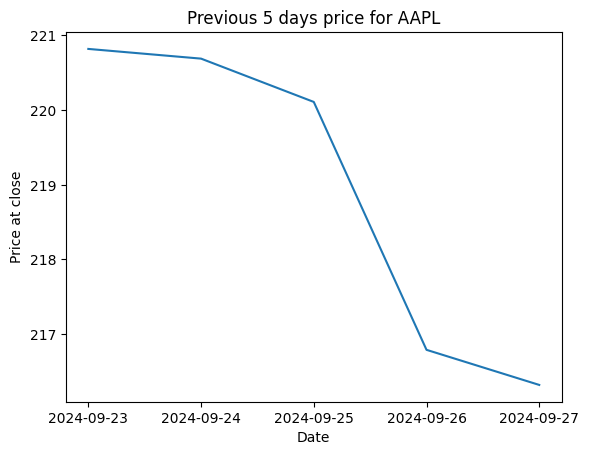

In [48]:
import datetime as dt
import matplotlib.pyplot as plt
dates = []
time_stamps = response.json()
for i in range(len(time_stamps['AAPL']["timestamp"])):
  x = str(time_stamps["AAPL"]["timestamp"][i])
  dates.append(str(dt.datetime.fromtimestamp(int(x)))[:10])


dates = dates[-5:]

prices = []
for i in range(len(time_stamps['AAPL']["close"])):
  x = str(time_stamps["AAPL"]["close"][i])
  prices.append(float(x))

prices.sort(reverse=True)
prices = prices[-5:]

df = pd.DataFrame(columns=["Date", "Price"], data=list(zip(dates, prices)))

plt.plot(dates,prices)
plt.xlabel("Date")
plt.ylabel("Price at close")
plt.title("Previous 5 days price for " + symbol)
plt.show()